## importance sampling 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad
from scipy import linalg as LA
import scipy.stats as stats
plt.style.use("ggplot")

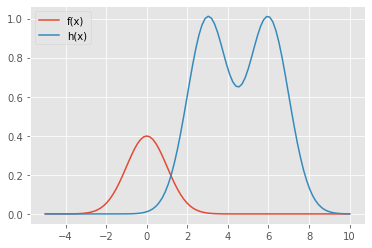

In [3]:
norm_f = stats.norm(0,1)
def f(x):
  return norm_f.pdf(x)

def h(x):
  return np.exp(-(x-3)**2 / 2) + np.exp( -(x-6)**2 / 2)

x = np.linspace(-5,10,100)
plt.plot(x, f(x))
plt.plot(x, h(x))
plt.legend(["f(x)", "h(x)"], loc=2)
plt.show()

## 理論値

In [4]:
hf = lambda x: h(x) * f(x)
quad(hf, -np.inf, np.inf)

(0.0746157703288339, 8.410126130058304e-09)

Monte Carlo Sampling

In [6]:
N = 2000
for i in range(5):
  x = norm_f.rvs(N)
  print(h(x).sum() / float(N))

0.08010678603587831
0.0755257963310187
0.07251048937450569
0.07592187941904606
0.07735508410997517


### importance sampling

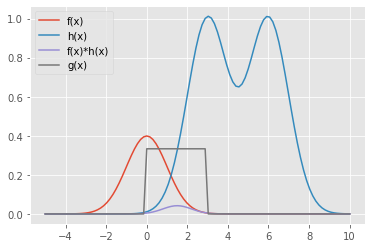

In [7]:
unif_g = stats.uniform(0,3)
def g(x):
  return unif_g.pdf(x)

x = np.linspace(-5,10,100)
plt.plot(x, f(x))
plt.plot(x, h(x))
plt.plot(x, f(x)*h(x))
plt.plot(x, g(x))
plt.legend(["f(x)", "h(x)", "f(x)*h(x)", "g(x)"], loc=2)
plt.show()

In [8]:
for i in range(5):
  x = unif_g.rvs(N)
  print(np.sum( h(x) * f(x) / g(x)) / float(N))

0.07141243173083768
0.0710433199668577
0.07136872115239742
0.07118340001641892
0.07161434527862061


### reversed chaged method

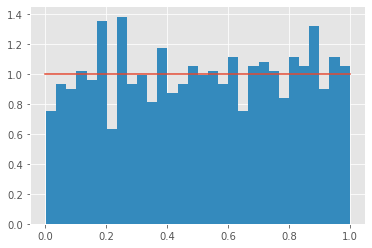

In [11]:
N = 1000
unif_f = stats.uniform(0,1)
def u(x):
  return unif_f.pdf(x)

x = np.linspace(0,1)
plt.plot(x, u(x))
plt.hist(unif_f.rvs(N), 30, density=True)
plt.show()

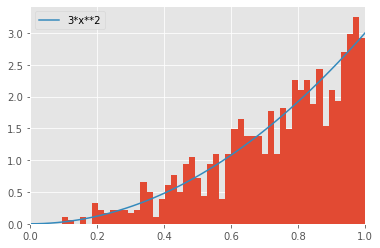

In [12]:
x = np.linspace(0,1)
rand_x = unif_f.rvs(N) ** (1/3.)
plt.hist(rand_x, 50, density=True)
plt.plot(x, 3 * x** 2, label="3*x**2")
plt.xlim(0,1)
plt.legend()
plt.show()

### rejection sampling

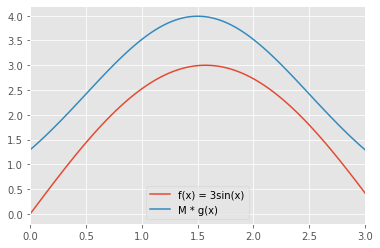

In [13]:
def f(x):
  return 3 * np.sin(x)

norm_g = stats.norm(1.5, 1)
def Mg(x):
  M = 10
  return M * norm_g.pdf(x)

x = np.linspace(0, 3, 100)
plt.plot(x, f(x), label="f(x) = 3sin(x)")
plt.plot(x, Mg(x), label="M * g(x)")
plt.xlim(0,3)
plt.legend()
plt.show()

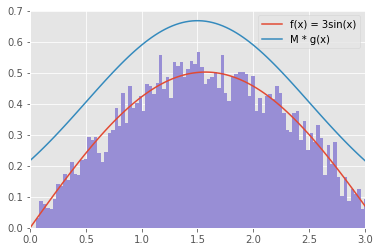

In [14]:
N = 10000
rand_x = norm_g.rvs(N)
rand_x2 = stats.uniform(0,1).rvs(N)
rand_x = rand_x[rand_x2 * Mg(rand_x) < f(rand_x)]

x = np.linspace(0, 3, 100)
A = quad(f, 0, 3)[0]

plt.plot(x, f(x) / A, label="f(x) = 3sin(x)")
plt.plot(x, Mg(x)/A, label="M * g(x)")
plt.hist(rand_x, 100, density=True)
plt.legend()
plt.xlim(0,3)
plt.show()